In [2]:
#import the necessary libraries
import pandas as pd   
from matplotlib import pyplot
import numpy as np
import time


from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics


In [3]:
df = pd.read_csv('train.csv')#reading the csv file train.csv

In [4]:
df.info()#this will give me the information of our table the datatypes the non null count as well

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   RecordID                       50000 non-null  int64  
 1   hospital_id                    50000 non-null  int64  
 2   icu_id                         50000 non-null  int64  
 3   ethnicity                      49424 non-null  object 
 4   gender                         49996 non-null  object 
 5   icu_admit_source               49953 non-null  object 
 6   icu_stay_type                  50000 non-null  object 
 7   icu_type                       50000 non-null  object 
 8   apache_3j_bodysystem           49724 non-null  object 
 9   apache_2_bodysystem            49724 non-null  object 
 10  age                            48199 non-null  float64
 11  elective_surgery               50000 non-null  int64  
 12  pre_icu_los_days               50000 non-null 

In [5]:
df.head()#prints the first 5 entries by default will give 5

,RecordID,hospital_id,icu_id,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem,...,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_potassium_max,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,immunosuppression,solid_tumor_with_metastasis,hospital_death
0,1,126,1931,Caucasian,M,Floor,transfer,Med-Surg ICU,Metabolic,Metabolic,...,86,93.0,86.0,NaN,NaN,0.01,0.00,0,0,0
1,2,112,1544,African American,M,Accident & Emergency,admit,Med-Surg ICU,Cardiovascular,Cardiovascular,...,95,95.0,95.0,333.0,3.7,NaN,NaN,0,0,0
2,3,153,1517,Caucasian,M,Floor,admit,MICU,Respiratory,Respiratory,...,162,174.0,162.0,160.0,4.2,0.38,0.15,0,0,0
3,4,109,1811,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Neurological,Neurologic,...,140,163.0,140.0,258.0,3.8,0.12,0.06,0,0,0
4,5,287,1845,Caucasian,F,Accident & Emergency,admit,CSICU,Cardiovascular,Cardiovascular,...,119,119.0,119.0,110.0,3.9,0.15,0.07,0,0,0


In [6]:
df.sample()#this will give any random numbered samples by default will give 1 

,RecordID,hospital_id,icu_id,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem,...,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_potassium_max,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,immunosuppression,solid_tumor_with_metastasis,hospital_death
4810,4811,237,1905,Caucasian,M,Operating Room / Recovery,admit,Med-Surg ICU,Gastrointestinal,Gastrointestinal,...,162,187.0,162.0,162.0,4.2,0.01,0.01,0,0,0


In [7]:
df.isnull().sum()#this will give us the total null values in each column

RecordID                            0
hospital_id                         0
icu_id                              0
ethnicity                         576
gender                              4
icu_admit_source                   47
icu_stay_type                       0
icu_type                            0
apache_3j_bodysystem              276
apache_2_bodysystem               276
age                              1801
elective_surgery                    0
pre_icu_los_days                    0
apache_2_diagnosis                276
apache_3j_diagnosis                64
apache_post_operative               0
gcs_eyes_apache                   405
gcs_motor_apache                  405
gcs_unable_apache                  42
gcs_verbal_apache                 405
heart_rate_apache                   2
intubated_apache                    0
resprate_apache                    62
temp_apache                      1249
ventilated_apache                   0
d1_diasbp_min                       0
d1_diasbp_no

In [8]:
df.dtypes#the data types of each column

RecordID                           int64
hospital_id                        int64
icu_id                             int64
ethnicity                         object
gender                            object
icu_admit_source                  object
icu_stay_type                     object
icu_type                          object
apache_3j_bodysystem              object
apache_2_bodysystem               object
age                              float64
elective_surgery                   int64
pre_icu_los_days                 float64
apache_2_diagnosis               float64
apache_3j_diagnosis              float64
apache_post_operative              int64
gcs_eyes_apache                  float64
gcs_motor_apache                 float64
gcs_unable_apache                float64
gcs_verbal_apache                float64
heart_rate_apache                float64
intubated_apache                   int64
resprate_apache                  float64
temp_apache                      float64
ventilated_apach

In [9]:
df.fillna(df.mean(), inplace=True)

C:\Users\Zuhair Shah\AppData\Local\Temp\ipykernel_23216\820435583.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [10]:
df_onehot = pd.get_dummies(df)
df_onehot.dtypes

RecordID                                     int64
hospital_id                                  int64
icu_id                                       int64
age                                        float64
elective_surgery                             int64
                                            ...   
apache_2_bodysystem_Renal/Genitourinary      uint8
apache_2_bodysystem_Respiratory              uint8
apache_2_bodysystem_Trauma                   uint8
apache_2_bodysystem_Undefined Diagnoses      uint8
apache_2_bodysystem_Undefined diagnoses      uint8
Length: 96, dtype: object

In [11]:
X = df_onehot.loc[:, df_onehot.columns != 'hospital_death']
y = df_onehot[['hospital_death']]

In [12]:
print(y['hospital_death'].value_counts())

0    45662
1     4338
Name: hospital_death, dtype: int64


In [13]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2)

In [14]:
dt_5_2 = DecisionTreeClassifier(max_depth=5)  
dt_5_2.fit(trainX,trainy)
#fit_model(dt_5_2, "Depth 5 Split 2") 
md_probs = dt_5_2.predict_proba(testX)

In [15]:
md_probs

array([[0.65569918, 0.34430082],
       [0.94454303, 0.05545697],
       [0.99194631, 0.00805369],
       ...,
       [0.94454303, 0.05545697],
       [0.9720516 , 0.0279484 ],
       [0.76451613, 0.23548387]])

In [16]:
md_probs = md_probs[:,1]
md_probs

array([0.34430082, 0.05545697, 0.00805369, ..., 0.05545697, 0.0279484 ,
       0.23548387])

In [17]:
md_auc = roc_auc_score(testy, md_probs)
md_auc

0.8566472311486875

In [18]:
def fit_model(model, model_name):
    model.fit(trainX,trainy)
    md_probs = model.predict_proba(testX)
    md_probs = md_probs[:,1]
    md_auc = roc_auc_score(testy, md_probs)
    print(model_name, " : ", md_auc)
    md_fpr, md_tpr, _ = roc_curve(testy, md_probs)
    pyplot.plot(md_fpr, md_tpr, marker='.', label=model_name)

Depth 5 Split 2  :  0.8476005387040099
Depth 7 Split 2  :  0.8347832933600376
Depth 5 Split 5  :  0.8475826921569186
Depth 7 Split 5  :  0.8325442059806702
Depth 3 Split 2  :  0.8363114700788299
Depth 3 Split 5  :  0.8363114700788299


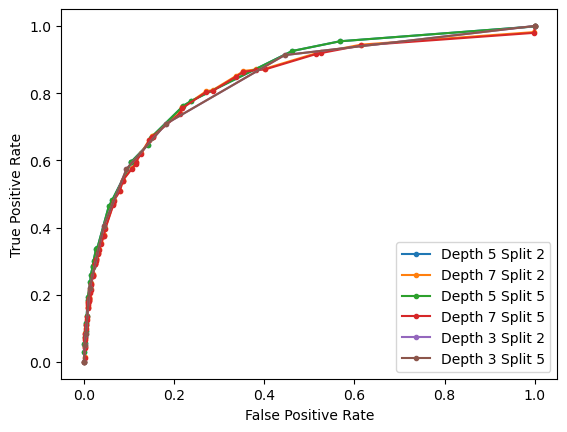

In [19]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3)#, random_state=2)
dt_5_2 = DecisionTreeClassifier(max_depth=5)  
fit_model(dt_5_2, "Depth 5 Split 2") 

dt_7_2 = DecisionTreeClassifier(max_depth=7)  
fit_model(dt_7_2, "Depth 7 Split 2") 

dt_5_5 = DecisionTreeClassifier(max_depth=5, min_samples_split=5)  
fit_model(dt_5_5, "Depth 5 Split 5") 

dt_7_5 = DecisionTreeClassifier(max_depth=7, min_samples_split=5)  
fit_model(dt_7_5, "Depth 7 Split 5") 

dt_3_2 = DecisionTreeClassifier(max_depth=3, min_samples_split=2)  
fit_model(dt_3_2, "Depth 3 Split 2") 

dt_3_5 = DecisionTreeClassifier(max_depth=3, min_samples_split=5)  
fit_model(dt_3_5, "Depth 3 Split 5") 

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [20]:
%%timeit -n1 -r1
parameters = {     
                'min_samples_split' : [2,5,8, 10],#,400],
                'max_depth'    : [3,5,7,9,11],
                
                }
dt = DecisionTreeClassifier()
cv = RepeatedKFold(n_splits=10, n_repeats=1)#, random_state=1)
grid_search = GridSearchCV(dt, parameters, cv=cv, n_jobs=-1, scoring='roc_auc',verbose=2)#, refit=False)
grid_search.fit(X, y)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
DecisionTreeClassifier(max_depth=5)
0.8445999005953613
{'max_depth': 5, 'min_samples_split': 2}
2min 4s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [21]:
df1 = pd.read_csv('train.csv')

In [22]:
df1.fillna(df1.mean(), inplace=True)

C:\Users\Zuhair Shah\AppData\Local\Temp\ipykernel_23216\3865222721.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.fillna(df1.mean(), inplace=True)


In [24]:
df_onehot1 = pd.get_dummies(df1)
df_onehot1.dtypes

RecordID                                     int64
hospital_id                                  int64
icu_id                                       int64
age                                        float64
elective_surgery                             int64
                                            ...   
apache_2_bodysystem_Renal/Genitourinary      uint8
apache_2_bodysystem_Respiratory              uint8
apache_2_bodysystem_Trauma                   uint8
apache_2_bodysystem_Undefined Diagnoses      uint8
apache_2_bodysystem_Undefined diagnoses      uint8
Length: 96, dtype: object

In [25]:
X = df_onehot1.loc[:, df_onehot1.columns != 'hospital_death']
y = df_onehot1[['hospital_death']]

In [26]:
print(y['hospital_death'].value_counts())

0    45662
1     4338
Name: hospital_death, dtype: int64


In [34]:
dt_train = DecisionTreeClassifier(max_depth=5)  
dt_train.fit(X,y)
#fit_model(dt_5_2, "Depth 5 Split 2") 
md_prob = dt_train.predict_proba(X)

In [35]:
md_prob

array([[0.98573775, 0.01426225],
       [0.94766051, 0.05233949],
       [0.75942645, 0.24057355],
       ...,
       [0.94766051, 0.05233949],
       [0.98573775, 0.01426225],
       [0.98573775, 0.01426225]])

In [36]:
md_prob = md_prob[:,1]
md_prob

array([0.01426225, 0.05233949, 0.24057355, ..., 0.05233949, 0.01426225,
       0.01426225])

In [37]:
md_auc = roc_auc_score(y, md_prob)
md_auc

0.8480486158452674

In [ ]:
df2 = pd.read_csv('test.csv')

In [38]:
def fit_model(model, model_name):
    model.fit(X,y)
    md_prob = model.predict_proba(X)
    md_prob = md_prob[:,1]
    md_auc = roc_auc_score(y, md_prob)
    print(model_name, " : ", md_auc)
    md_fpr, md_tpr, _ = roc_curve(y, md_prob)
    pyplot.plot(md_fpr, md_tpr, marker='.', label=model_name)

In [ ]:
%%timeit -n1 -r1
parameters = {     
                'min_samples_split' : [2,5,8, 10],#,400],
                'max_depth'    : [3,5,7,9,11],
                
                }
dt = DecisionTreeClassifier()
cv = RepeatedKFold(n_splits=10, n_repeats=1)#, random_state=1)
grid_search = GridSearchCV(dt, parameters, cv=cv, n_jobs=-1, scoring='roc_auc',verbose=2)#, refit=False)
grid_search.fit(X, y)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_params_)